#### **Running fuzzy clustering algorithm to create cognitive and behavioral profiles in 2y and 4y datasets.**

Following cells will be dedicated to run a CLI based tool performing fuzzy clustering on the raw behavioral and cognitive variables. This will generate the membership values needed for the graph network computation.

Test out first if we extract the same profiles as the baseline data, if so, simply predict the new timepoints.

**Please note, the clustering process can take roughly 1h (depending on the number of cores used). It can be run directly in the notebook, but it will most likely be much faster to run it in a dedicated terminal window. To do so, simply copy and paste the command line, and change the relevant paths to point to your data. You can also select the desired number of cores to use during the clustering process.**

In [102]:
# Imports
import os
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from neurostatx.io.utils import load_df_in_any_format

In [3]:
# Setting up relevant paths.
repository_path = "/Users/anthonygagnon/code/Article-s-code/" # CHANGE THIS
abcd_base_path = "/Volumes/T7/CCPM/ABCD/Release_5.1/abcd-data-release-5.1/" # CHANGE THIS
output_folder = "/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles" # CHANGE THIS

# Setting up the paths for output subfolder.
output_dir = f"{output_folder}/fuzzyclustering/" # DO NOT CHANGE THIS
os.makedirs(output_dir, exist_ok=True)

#### **Running FCM algorithm on 2y behavioral and cognitive data.**

**This is a long running process, go get a coffee!**

In [18]:
# Running Clustering on raw variables using a CLI tool, therefore 
# using the ! flag beforehand. Running up to 20 clusters.
# ** This is a long running process. Go get a coffee ! **

!FuzzyClustering --in-dataset "{output_folder}/datapreprocessing/abcd_2y_preprocessed.xlsx" \
    --out-folder "{output_dir}/ABCD_2y_FCM/" \
    --desc-columns 22 --id-column "subjectkey" --pca --k 20 --m 2 \
    --metric mahalanobis --maxiter 5000 --error 1e-06 --cmap "bone_r" \
    --radarplot -v -s -f --processes 6

2024-11-08 16:49:48 Anthonys-MacBook-Pro.local root[15413] INFO Loading dataset(s)...
2024-11-08 16:49:49 Anthonys-MacBook-Pro.local root[15413] INFO Applying PCA dimensionality reduction.
2024-11-08 16:49:49 Anthonys-MacBook-Pro.local root[15413] INFO Bartlett's test of sphericity returned a p-value of 0.0 and Keiser-Meyer-Olkin (KMO) test returned a value of 0.6555029770016774.
2024-11-08 16:49:52 Anthonys-MacBook-Pro.local root[15413] INFO Generating dendrogram.
2024-11-08 16:49:56 Anthonys-MacBook-Pro.local root[15413] INFO Computing FCM from k=2 to k=20
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed: 22.4min finished
2024-11-08 17:12:18 Anthonys-MacBook-Pro.local root[15413] INFO Plotting validation indicators and outputting final matrices.


#### **Running FCM algorithm on 4y behavioral and cognitive data.**

**This is a long running process, go get a coffee!**

In [11]:
# Running Clustering on raw variables using a CLI tool, therefore 
# using the ! flag beforehand. Running up to 20 clusters.
# ** This is a long running process. Go get a coffee ! **

!FuzzyClustering --in-dataset "{output_folder}/datapreprocessing/abcd_4y_preprocessed.xlsx" \
    --out-folder "{output_dir}/ABCD_4y_FCM/" \
    --desc-columns 13 --id-column "subjectkey" --pca --k 20 --m 2 \
    --metric mahalanobis --maxiter 5000 --error 1e-06 --cmap "bone_r" \
    --radarplot -v -s -f --processes 6

2024-11-07 09:32:08 MacBookPro.med.usherbrooke.ca root[47167] INFO Loading dataset(s)...
2024-11-07 09:32:08 MacBookPro.med.usherbrooke.ca root[47167] INFO Applying PCA dimensionality reduction.
2024-11-07 09:32:08 MacBookPro.med.usherbrooke.ca root[47167] INFO Bartlett's test of sphericity returned a p-value of 0.0 and Keiser-Meyer-Olkin (KMO) test returned a value of 0.6456440805816648.
2024-11-07 09:32:10 MacBookPro.med.usherbrooke.ca root[47167] INFO Generating dendrogram.
2024-11-07 09:32:11 MacBookPro.med.usherbrooke.ca root[47167] INFO Computing FCM from k=2 to k=20
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:  5.9min finished
2024-11-07 09:38:08 MacBookPro.med.usherbrooke.ca root[47167] INFO Plotting validation indicators and outputting final matrices.


#### **Plot the silhouette score for each time point.**

The following cells will load back the silhouette scores for each clustering process (baseline, 2 years, 4 years) and overlay those curves on a single plot.

In [4]:
# Load back the silhouette scores for each time point.
baseline_ss = load_df_in_any_format(f"{output_folder}/../fuzzyclustering/ABCDFuzzyCMeans/validation_indices.xlsx")
y2_ss = load_df_in_any_format(f"{output_dir}/ABCD_2y_FCM/validation_indices.xlsx")
y4_ss = load_df_in_any_format(f"{output_dir}/ABCD_4y_FCM/validation_indices.xlsx")

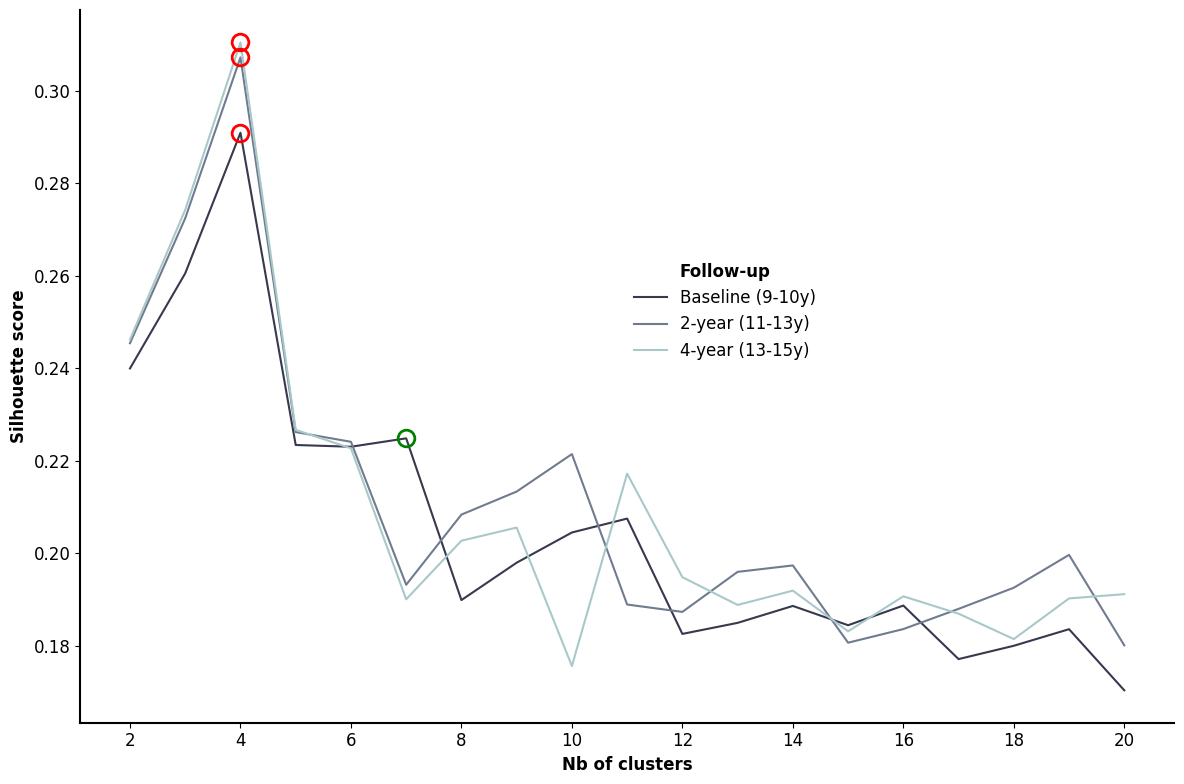

In [12]:
# Plot the silhouette scores for each time point.
baseline_ss.index = [i+2 for i in range(0, len(baseline_ss))]
y2_ss.index = [i+2 for i in range(0, len(y2_ss))]
y4_ss.index = [i+2 for i in range(0, len(y4_ss))]

colormap=sns.color_palette("bone", n_colors=3)

with plt.rc_context(
        {"font.family": "Sans Serif",
         "font.size": 12, "font.weight": "normal", "axes.titleweight": "bold",
         }
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sns.lineplot(baseline_ss["Silhouette Score"], color=colormap[0], ax=ax, label="Baseline (9-10y)")
    sns.lineplot(y2_ss["Silhouette Score"], color=colormap[1], ax=ax, label="2-year (11-13y)")
    sns.lineplot(y4_ss["Silhouette Score"], color=colormap[2], ax=ax, label="4-year (13-15y)")
    ax.set_xlabel("Nb of clusters", fontdict={"weight": "bold"})
    ax.set_ylabel("Silhouette score", fontdict={"weight": "bold"})
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['bottom', 'left']].set_linewidth(1.5)
    ax.legend(frameon=False, title="Follow-up", loc=(0.5, 0.5),
              title_fontproperties={"weight": "bold"})
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add red circles for the optimal number of clusters.
    ax.plot(4, baseline_ss['Silhouette Score'][4], marker='.', markersize=24,
            mfc='none', mec='r', mew=2)
    ax.plot(4, y2_ss['Silhouette Score'][4], marker='.', markersize=24,
            mfc='none', mec='r', mew=2)
    ax.plot(4, y4_ss['Silhouette Score'][4], marker='.', markersize=24,
            mfc='none', mec='r', mew=2)
    ax.plot(7, baseline_ss['Silhouette Score'][7], marker='.', markersize=24,
            mfc='none', mec='g', mew=2)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/silhouette_scores.png", dpi=600)
    plt.show()

#### **Create a radar plot with matching profile label for comparison with baseline data.**

Since the fuzzy C-Means algorithm initiates the centroids at a random location each time the algorithm is run, most often the cluster labels do not match (e.g. you run it one time, the MC/HSI cluster has a label of 1, then, you rerun the algorithm and the profile MC/HSI has a label of 4). This doesn't affect the results, since the membership values to each cluster for each participant is nearly identical. However, it might become confusing when creating figures. The next cells will match the profile label for each time point to create similar radar plots. If you want to reproduce those steps, you will need to manually match the labels with the baseline data. 

**My current labelling of baseline data:**
1. Profile 1 (MC/HSI)
2. Profile 2 (MC/HE)
3. Profile 3 (HC/LB)
4. Profile 4 (LC/LB)

In [93]:
def radar_plot(X, labels, output, frame='circle', title="Radar plot",
               cmap='magma'):
    """
    Function to plot a radar plot for all features in the original dataset
    stratified by clusters. T-test between clusters' mean within a feature is
    also computed and annotated directly on the plot. When plotting a high
    number of clusters, plotting of significant annotation is polluting the
    plot, will be fixed in the future.

    Parameters
    ----------
    X : DataFrame
        Input dataset of shape (S, F).
    labels : np.array
        Array of hard membership value (S, ).
    output : str
        Filename of the png file.
    frame : str, optional
        Shape of the radar plot. Defaults to 'circle'. Choices are 'circle'
        or 'polygon'.
    title : str, optional
        Title of the plot. Defaults to 'Radar plot'.
    cmap : str, optional
        Colormap to use for the plot. Defaults to 'magma'. See
        https://matplotlib.org/stable/tutorials/colors/colormaps.html
    """

    # Setting color palette.
    cmap = get_cmap(cmap, len(np.unique(labels)))
    colors = [rgb2hex(cmap(i)) for i in range(cmap.N)]

    # Make labels start at 1 rather than 0, better for viz.
    labels = labels + 1

    # Axis labels.
    var_labels = X.columns.tolist()
    var_labels.append(var_labels[0])

    # Computing ANOVA for each features.
    anova = []
    i = 0
    for col in X.columns:
        f, p = f_oneway(*[X.loc[labels == k, col] for k in np.unique(labels)])
        anova.append(p)
        i += 1

    # Computing mean values for each features for each clusters.
    mean_df = pd.DataFrame()
    i = 0
    for col in X.columns:
        mean = list()
        for k in np.unique(labels):
            mean.append(X.loc[labels == k, col].mean())
        mean_df.insert(i, col, mean)
        i += 1

    # Computing stds for each features for each clusters.
    std_df = pd.DataFrame()
    i = 0
    for col in X.columns:
        std = list()
        for k in np.unique(labels):
            std.append(X.loc[labels == k, col].std())
        std_df.insert(i, col, std)
        i += 1
    max_val = math.ceil((mean_df + std_df).max().max())
    min_val = math.floor((mean_df - std_df).min().min())

    mean_df.insert(i, "Clusters", np.unique(labels))
    std_df.insert(i, "Clusters", np.unique(labels))

    with plt.rc_context(
        {"font.size": 12, "font.weight": "bold", "axes.titleweight": "bold",
         "font.family": "Sans Serif"}
    ):
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, polar=True)

        # Set radar plot parameters.
        theta = create_radar_plot(len(X.columns), frame=frame)

        for idx, cluster in enumerate(np.unique(labels)):
            values = mean_df.iloc[idx].drop('Clusters').values.tolist()
            values.append(values[0])
            stds = std_df.iloc[idx].drop('Clusters').values.tolist()
            stds.append(stds[0])
            stds_pos = [np.sum(x) for x in zip(values, stds)]
            stds_neg = [s - d for s, d in zip(values, stds)]
            ax.plot(theta, values, c=colors[idx], linewidth=2,
                    label=f'Cluster {cluster}', markersize=4, zorder=3)
            plot = ax.errorbar(theta, values, yerr=stds, fmt='o-',
                               color=colors[idx], linewidth=0,
                               label=f'Cluster {cluster}')
            ax.fill_between(theta, values, stds_pos, alpha=0.2,
                            color=colors[idx], edgecolor='none',
                            label='_nolegend_')
            ax.fill_between(theta, values, stds_neg, alpha=0.2,
                            color=colors[idx], edgecolor='none',
                            label='_nolegend_')

            plot[-1][0].set_color(colors[idx])

    # Add p-values to the plot.
    for i, p in enumerate(anova):
        if 0.01 < p < 0.05:
            ax.text(theta[i], max_val * 0.95, '*', fontsize=24, color='black',
                    weight='bold', rotation=math.degrees(theta[i]) + 90)
        elif 0.001 < p < 0.01:
            ax.text(theta[i], max_val * 0.95, '**', fontsize=24, color='black',
                    weight='bold', rotation=math.degrees(theta[i]) + 90)
        elif p < 0.001:
            ax.text(theta[i], max_val * 0.95, '***', fontsize=24,
                    color='black', weight='bold',
                    rotation=math.degrees(theta[i]) + 90,
                    ha='center', va='center')

    # Set legend and variables parameters.
    legend = ax.legend(np.unique(labels), loc=(0.95, 0.05), title='Profile #',
                       fontsize=14)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    ax.set_thetagrids(theta * 180 / np.pi, var_labels, zorder=1)
    ax.set_rlabel_position(-36)
    ax.set_ylim(min_val, max_val)
    yticks = np.arange(min_val, max_val, 0.5)
    ax.set_yticks(yticks)

    # Set spines and title parameters.
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)
    ax.grid(axis='y', color='lightgray', linewidth=1, zorder=3)
    ax.grid(axis='x', color='lightgray', linewidth=.5, zorder=2)
    ax.set_facecolor('white')
    ax.set_xticklabels(var_labels, fontsize=24, weight='bold')

    ax.set_title(f"{title}", weight='bold', size=24,
                 horizontalalignment='center')

    # Set the position for the labels.
    for label, angle in zip(ax.get_xticklabels(), theta):
        if angle == 0:
            label.set_horizontalalignment('left')
        elif angle == np.pi:
            label.set_horizontalalignment('right')
        elif 0 < angle < np.pi / 2 or angle > 3 * np.pi / 2:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    plt.tight_layout()
    plt.savefig(f"{output}", dpi=300)
    plt.close()


def create_radar_plot(nb_vars, frame='circle'):
    """
    Create a radar chart with `nb_vars` axes.

    Args:
        nb_vars (int):          Number of variables to plot.
        frame (str, optional):  Shape of the radar plot. Defaults to 'circle'.
                                Choices are 'circle' or 'polygon'.

    Returns:
        np.array:               Array of evenly spaced axis angles.
    """

    # Compute evenly spaced axis angles.
    theta = np.linspace(0, 2 * np.pi, nb_vars, endpoint=False)
    theta = np.concatenate((theta, [theta[0]]))

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(nb_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # Rotate plot to place the first axis at the top.
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default.

            Args:
                closed (bool, optional): _description_. Defaults to True.
            """
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """
            Override plot so that line is closed by default.
            """
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), nb_vars,
                                      radius=0.5, edgecolor='k')
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':

                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(nb_vars))
                spine.set_transform(
                    Affine2D().scale(0.5).translate(0.5, 0.5) + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)

    return theta

In [94]:
# Load back the cluster assignments for each time point.
abcd_2y = load_df_in_any_format(f"{output_dir}/ABCD_2y_FCM/MEMBERSHIP_DF/clusters_membership_4.xlsx")

# Swap columns to match the baseline cluster assignments.
cols = ['subjectkey', 'Site', 'Sex', 'Ethnicity', 'Parent_ed1', 'Parent_ed2', 'Income', 'high_edu',
        'ParentalEducation', 'IncomeGroups', 'Handedness', 'Vision', 'AgeMonths', 'ADHD', 'AD',
        'OCD', 'DD', 'BPD', 'ODD', 'CD', 'PTSD', 'PSYPATHO', 'Internalizing', 'Externalizing',
        'Stress', 'EFPS', 'MEM', 'VA', 'Cluster #3', 'Cluster #4', 'Cluster #1', 'Cluster #2']
abcd_2y = abcd_2y[cols]

# Change column names to match the baseline cluster assignments.
abcd_2y = abcd_2y.rename(columns={"Externalizing": "Externalization", "Internalizing": "Internalization"})

# Save the new fcm dataframe.
abcd_2y.to_excel(f"{output_dir}/fcm_2y.xlsx", index=False)

In [98]:
# Fetch the main cluster profile for each participant.
abcd_2y['Profile'] = np.argmax(abcd_2y[['Cluster #3', 'Cluster #4', 'Cluster #1', 'Cluster #2']].values, axis=1)

# Print the number of participants in each cluster.
print(abcd_2y.Profile.value_counts())

# Scale the values by dividing them by the maximum value. Using a loop to avoid hardcoding.
vars = ['Internalization', 'Externalization', 'Stress', 'VA', 'EFPS', 'MEM']

for var in vars:
    abcd_2y.loc[:, var] = MinMaxScaler((0, 5)).fit_transform(abcd_2y[[var]])

radar_plot(abcd_2y.loc[:, vars], abcd_2y.Profile, title='ABCD 2-year follow-up',
           output=f"{output_dir}/RadarPlot2y.png", cmap="bone")

Profile
2    2631
3    2504
0    1130
1    1104
Name: count, dtype: int64


In [96]:
# Load back the cluster assignments for each time point. (4-year follow-up)
abcd_4y = load_df_in_any_format(f"{output_dir}/ABCD_4y_FCM/MEMBERSHIP_DF/clusters_membership_4.xlsx")

# Swap columns to match the baseline cluster assignments.
cols = ['subjectkey', 'Site', 'Sex', 'Ethnicity', 'Parent_ed1', 'Parent_ed2',
       'Income', 'high_edu', 'ParentalEducation', 'IncomeGroups', 'Handedness',
       'Vision', 'AgeMonths', 'Internalizing', 'Externalizing', 'Stress',
       'EFPS', 'MEM', 'VA', 'Cluster #3', 'Cluster #4', 'Cluster #2',
       'Cluster #1']
abcd_4y = abcd_4y[cols]

# Change column name for consistency.
abcd_4y = abcd_4y.rename(columns={"Externalizing": "Externalization", "Internalizing": "Internalization"})

# Save the new fcm dataframe.
abcd_4y.to_excel(f"{output_dir}/fcm_4y.xlsx", index=False)

In [99]:
# Get main cluster assignments.
abcd_4y['Profile'] = np.argmax(abcd_4y[['Cluster #3', 'Cluster #4', 'Cluster #2', 'Cluster #1']].values, axis=1)

# Print the number of participants in each cluster.
print(abcd_4y.Profile.value_counts())

# Scale the values by dividing them by the maximum value. Using a loop to avoid hardcoding.
vars = ['Internalization', 'Externalization', 'Stress', 'VA', 'EFPS', 'MEM']

for var in vars:
    abcd_4y.loc[:, var] = MinMaxScaler((0, 5)).fit_transform(abcd_4y[[var]])

radar_plot(abcd_4y.loc[:, vars], abcd_4y.Profile, title='ABCD 4-year follow-up',
           output=f"{output_dir}/RadarPlot4y.png", cmap="bone")

Profile
3    1018
2    1015
0     436
1     377
Name: count, dtype: int64


#### **Build a Graph Network object for each follow-up**

The next few cells will build and visualize the Graph Network object for each follow-up. 

In [66]:
# Compute the Graph Network layout.
!ComputeGraphNetwork --in-dataset "{output_dir}/fcm_2y.xlsx" \
    --out-folder "{output_dir}/GraphNetwork2y/" --id-column "subjectkey" --desc-columns 28 \
    --layout spring --weight membership -v -f -s --import-data --plot-distribution

2024-11-08 22:25:25 Anthonys-MacBook-Pro.local root[94917] INFO Loading membership data.
2024-11-08 22:25:27 Anthonys-MacBook-Pro.local root[94917] INFO Computing graph network layout.
2024-11-08 22:26:19 Anthonys-MacBook-Pro.local root[94917] INFO Setting nodes position.
2024-11-08 22:26:19 Anthonys-MacBook-Pro.local root[94917] INFO Importing data within the .gml file.


In [76]:
# Compute the Graph Network layout.
!ComputeGraphNetwork --in-dataset "{output_dir}/fcm_4y.xlsx" \
    --out-folder "{output_dir}/GraphNetwork4y/" --id-column "subjectkey" --desc-columns 19 \
    --layout spring --weight membership -v -f -s --import-data --plot-distribution

2024-11-08 22:33:06 Anthonys-MacBook-Pro.local root[1555] INFO Loading membership data.
2024-11-08 22:33:07 Anthonys-MacBook-Pro.local root[1555] INFO Computing graph network layout.
2024-11-08 22:33:17 Anthonys-MacBook-Pro.local root[1555] INFO Setting nodes position.
2024-11-08 22:33:17 Anthonys-MacBook-Pro.local root[1555] INFO Importing data within the .gml file.


In [74]:
# Visualize the Graph Network layout. (2y follow-up)
!VisualizeGraphNetwork --in-graph "{output_dir}/GraphNetwork2y/network_graph_file.gml" \
    --out-folder "{output_dir}/VizNetwork2y" --weight "membership" --colormap "bone_r" \
    -v -f -s --label-name "ADHD" --label-name "AD" --label-name "OCD" --label-name "CD" \
    --label-name "ODD" --label-name "DD" --label-name "PSYPATHO"

2024-11-08 22:32:26 Anthonys-MacBook-Pro.local root[1000] INFO Loading graph data.
2024-11-08 22:32:28 Anthonys-MacBook-Pro.local root[1000] INFO Generating graph.
2024-11-08 22:32:31 Anthonys-MacBook-Pro.local root[1000] INFO Constructing graph(s) with custom labels.


In [77]:
# Visualize the Graph Network layout. (4y follow-up)
!VisualizeGraphNetwork --in-graph "{output_dir}/GraphNetwork4y/network_graph_file.gml" \
    --out-folder "{output_dir}/VizNetwork4y" --weight "membership" --colormap "bone_r" \
    -v -f -s

2024-11-08 22:33:19 Anthonys-MacBook-Pro.local root[1749] INFO Loading graph data.
2024-11-08 22:33:19 Anthonys-MacBook-Pro.local root[1749] INFO Generating graph.


#### **Exporting results from the one-way ANOVA between profiles on the raw cognitive and behavioral variables.**

When generating the radar plot, a one-way ANOVA is computed to determine the statistical difference between profiles for each raw variable. However, results are not exported in tabular format but appended to the radar plot. The next cells will compute the ANOVA, and export the results in a table. The exported table will include results from the combined and individual studies. Additionally, Tukey HSD posthoc test will be conducted to further detail the difference in means between each profile.

In [104]:
# Computing the ANOVA for the 2 year follow-up.
anova_2y = []
for var in vars:
    f, p = f_oneway(*[abcd_2y.loc[abcd_2y.Profile == i, var] for i in np.unique(abcd_2y.Profile)])
    anova_2y.append([var, f, p])

anova_2y = pd.DataFrame(anova_2y, columns=['Variable', 'F_comb', 'p_comb'])
anova_2y.set_index('Variable', inplace=True)

anova_2y.to_excel(f"{output_dir}/anova_2y.xlsx")


In [103]:
# Add string to profiles label, easy to interpret tables afterwards.
abcd_2y.loc[:, 'Profile'] = abcd_2y.Profile.apply(lambda x: f"Profile {x+1}")

# Tukey's HSD post-hoc test.
tukey_2y = []

for var in vars:
    tukey = pairwise_tukeyhsd(abcd_2y[var], abcd_2y.Profile, alpha=0.05)
    tukey_2y.append(tukey.summary())

with pd.ExcelWriter(f"{output_dir}/Tukey_results_2y.xlsx") as writer:
    for i, var in enumerate(vars):
        pd.DataFrame(tukey_2y[i]).to_excel(writer, sheet_name=f"{var}_combined", header=False, index=False)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_71981/3704368498.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Profile 2' 'Profile 2' 'Profile 3' ... 'Profile 3' 'Profile 3'
 'Profile 4']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  abcd_2y.loc[:, 'Profile'] = abcd_2y.Profile.apply(lambda x: f"Profile {x+1}")


In [105]:
# Computing the ANOVA for the 4 year follow-up.
anova_4y = []
for var in vars:
    f, p = f_oneway(*[abcd_4y.loc[abcd_4y.Profile == i, var] for i in np.unique(abcd_4y.Profile)])
    anova_4y.append([var, f, p])

anova_4y = pd.DataFrame(anova_4y, columns=['Variable', 'F_comb', 'p_comb'])
anova_4y.set_index('Variable', inplace=True)

anova_4y.to_excel(f"{output_dir}/anova_4y.xlsx")

In [106]:
# Add string to profiles label, easy to interpret tables afterwards.
abcd_4y.loc[:, 'Profile'] = abcd_4y.Profile.apply(lambda x: f"Profile {x+1}")

# Tukey's HSD post-hoc test.
tukey_4y = []

for var in vars:
    tukey = pairwise_tukeyhsd(abcd_4y[var], abcd_4y.Profile, alpha=0.05)
    tukey_4y.append(tukey.summary())

with pd.ExcelWriter(f"{output_dir}/Tukey_results_4y.xlsx") as writer:
    for i, var in enumerate(vars):
        pd.DataFrame(tukey_4y[i]).to_excel(writer, sheet_name=f"{var}_combined", header=False, index=False)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_71981/865758372.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Profile 2' 'Profile 2' 'Profile 3' ... 'Profile 4' 'Profile 1'
 'Profile 4']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  abcd_4y.loc[:, 'Profile'] = abcd_4y.Profile.apply(lambda x: f"Profile {x+1}")
